In [2]:
# Importing Libraries

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
import warnings
from itertools import combinations
import plotly.express as px
from matplotlib.pyplot import figure
from skimpy import skim
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
import warnings
# Disable all warnings
warnings.filterwarnings ('ignore')

In [4]:
# Preprocessing

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA   ┃ NA %   ┃ mean   ┃ sd   ┃ p0  ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ CustomerID                  │    0 │      0 │    100 │   58 │   1 │    51 │   100 │  150 │   200 │ ▇▇▇▇▇▇  │  │
│ │ Age                         │    0 │      0 │     39 │   14 │  18 │    29 │    36 │   49 │    70 │ ▆▇▅▅▃▂  │  │
│ │ Annual Income (k$)          │    0 │      0 │     61 │   26 │  15 │    42 │    62 │   78 │   140 │ ▅▇▇▅▂▁  │  │
│ │ Spending Score (1-100)      │    0 │      0 │     50 │   26 │   1 │    35 │    50 │   73 │    99 │ ▅▃▇▇▅▅  │  │
│ └─────────────────────────────┴──────┴────────┴────────┴──────┴─────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

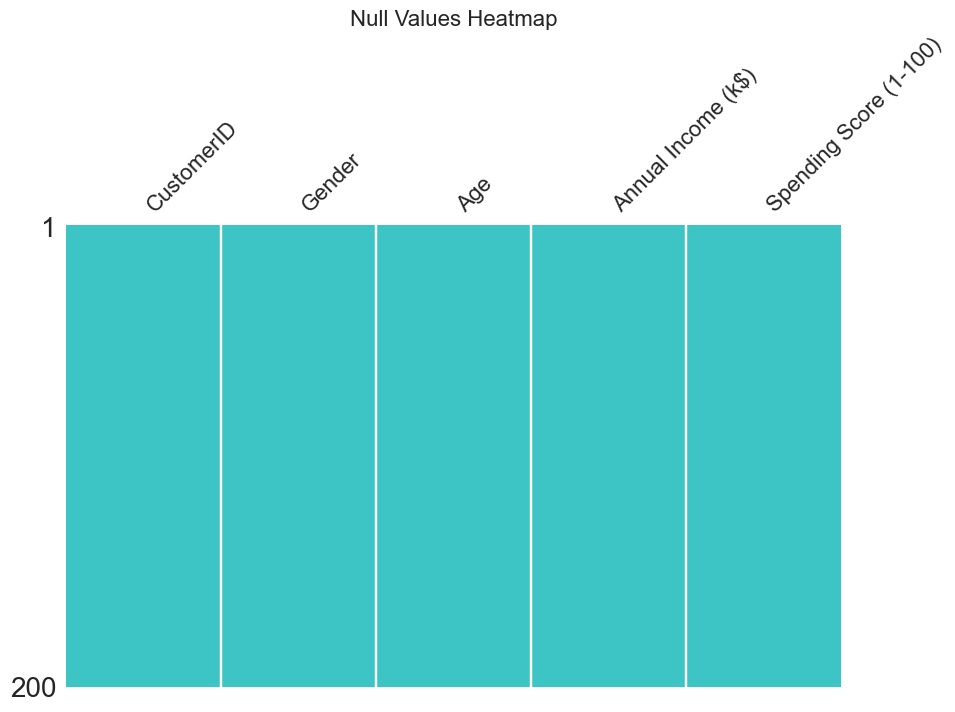

In [13]:
import missingno as msno
msno.matrix(df, figsize=(10, 6), sparkline=False, color=(0.24, 0.77, 0.77))
plt.title('Null Values Heatmap', fontsize=16)
plt.show()

In [14]:
# Numerical values distribution graphs

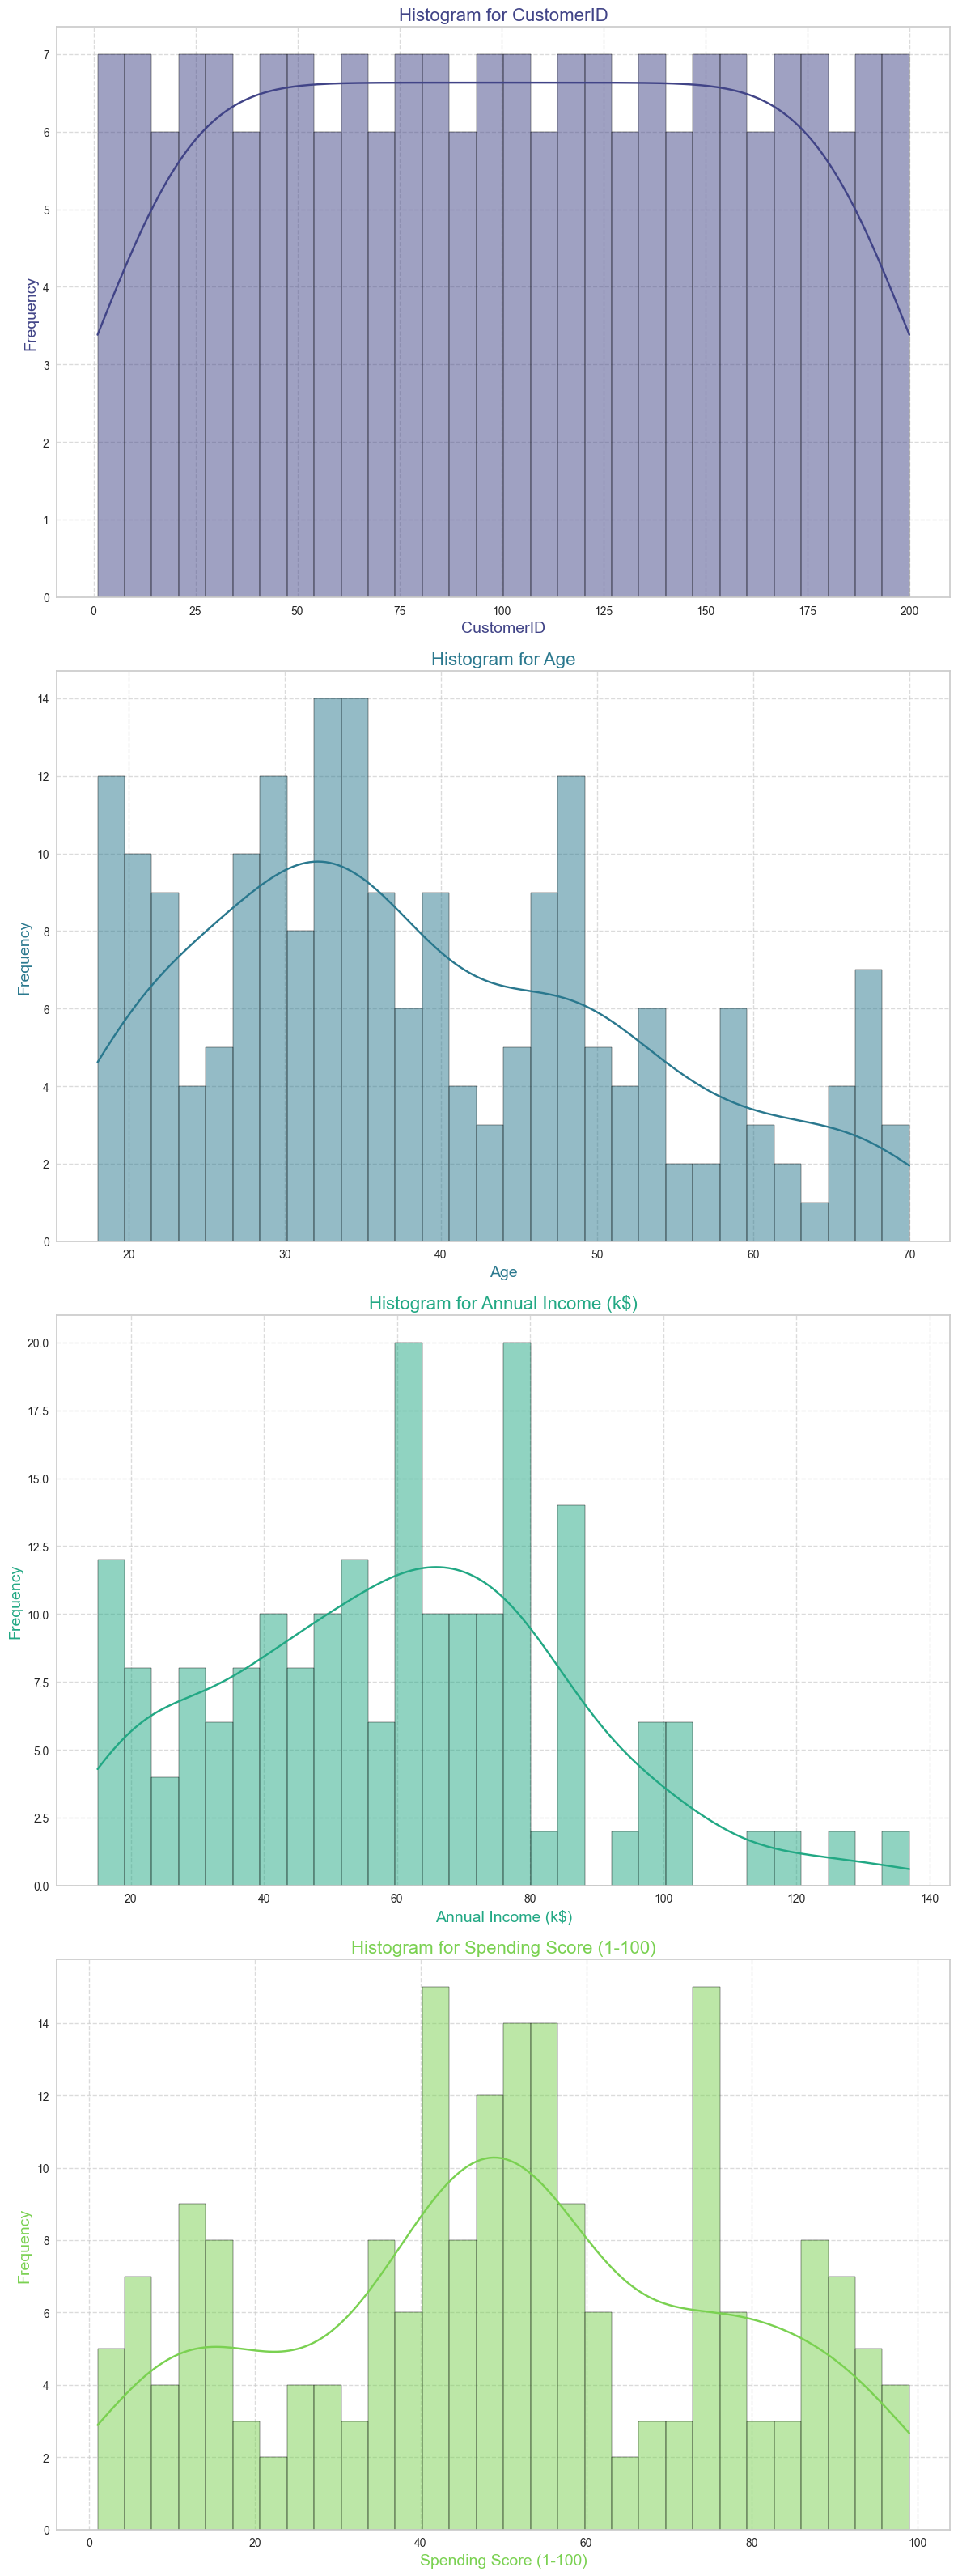

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12, 8 * len(num_cols)))
colors = sns.color_palette("viridis", n_colors=len(num_cols))
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.histplot(data=df, x=col, kde=True, color=color, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram for {col}', fontsize=16, color=color)
    axes[i].set_xlabel(col, fontsize=14, color=color)
    axes[i].set_ylabel('Frequency', fontsize=14, color=color)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

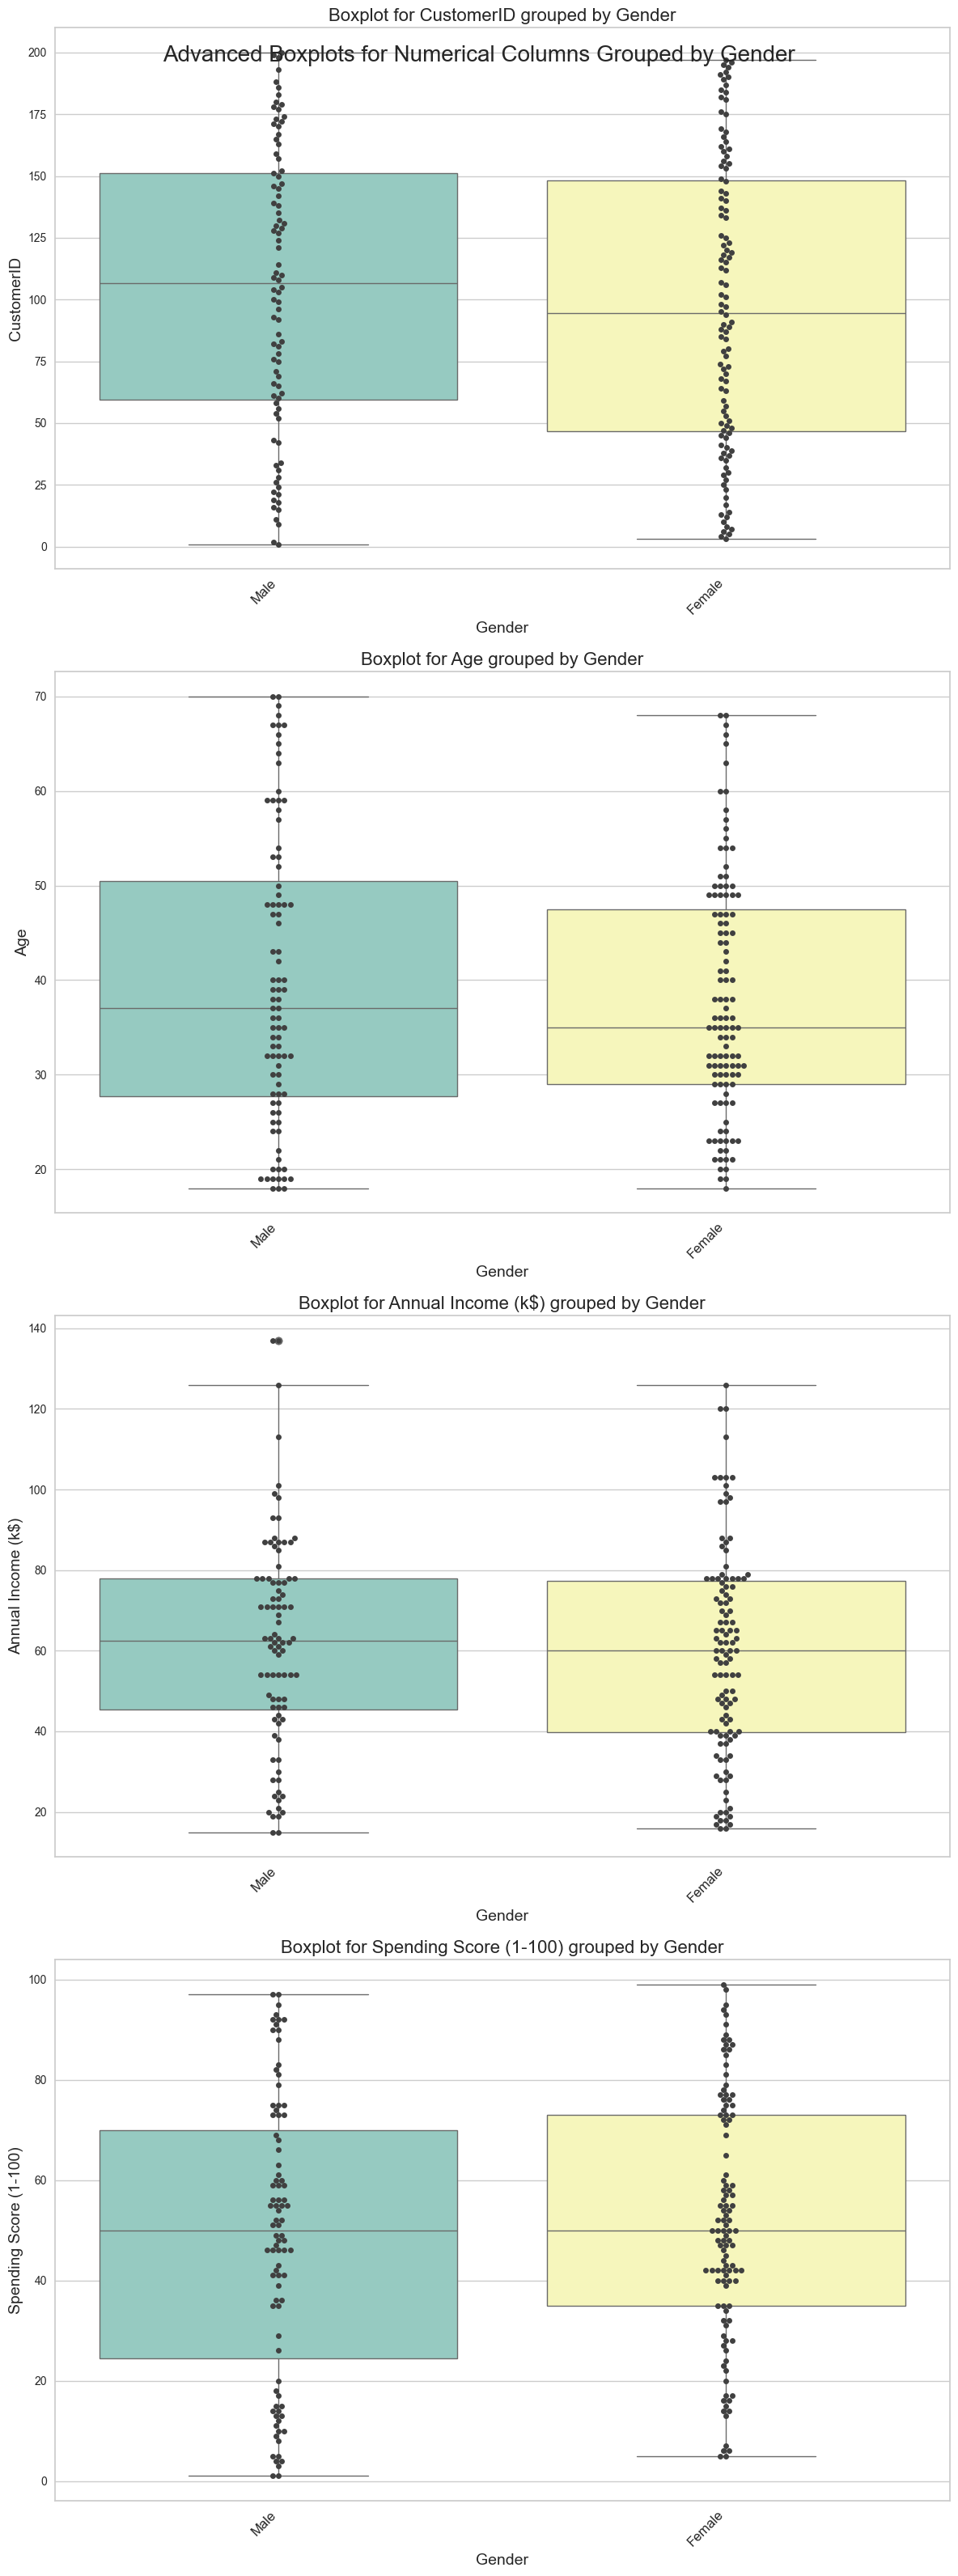

In [16]:
def create_boxplots(df, categorical_column):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12, 8 * len(num_cols)))
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for i, col in enumerate(num_cols):
        sns.set_theme(style="whitegrid")  # Set Seaborn theme for better aesthetics
        ax = sns.boxplot(data=df, y=col, x=categorical_column, ax=axes[i], palette="Set3")
        ax.set_title(f'Boxplot for {col} grouped by {categorical_column}', fontsize=16)
        ax.set_xlabel(categorical_column, fontsize=14)
        ax.set_ylabel(col, fontsize=14)
        sns.swarmplot(data=df, x=categorical_column, y=col, color=".25", ax=axes[i])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    plt.tight_layout()
    plt.suptitle(f'Advanced Boxplots for Numerical Columns Grouped by {categorical_column}', fontsize=20)
    plt.show()

create_boxplots(df, "Gender")

In [17]:
## The data doesn't have any outlier

In [20]:
# EXPLORATORY DATA ANALYSIS

In [21]:
def one_hot_encode_columns(df, columns_to_encode):
    """
    Perform one-hot encoding for specified columns in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - columns_to_encode: list
        List of column names to be one-hot encoded.

    Returns:
    - DataFrame
        The DataFrame with specified columns one-hot encoded.
    """
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)
    df_encoded = df_encoded.astype(int)
    return df_encoded


df2 = one_hot_encode_columns(df, columns_to_encode=['Gender'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [24]:
df_train=df2.drop('CustomerID',axis=1)
df_train.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


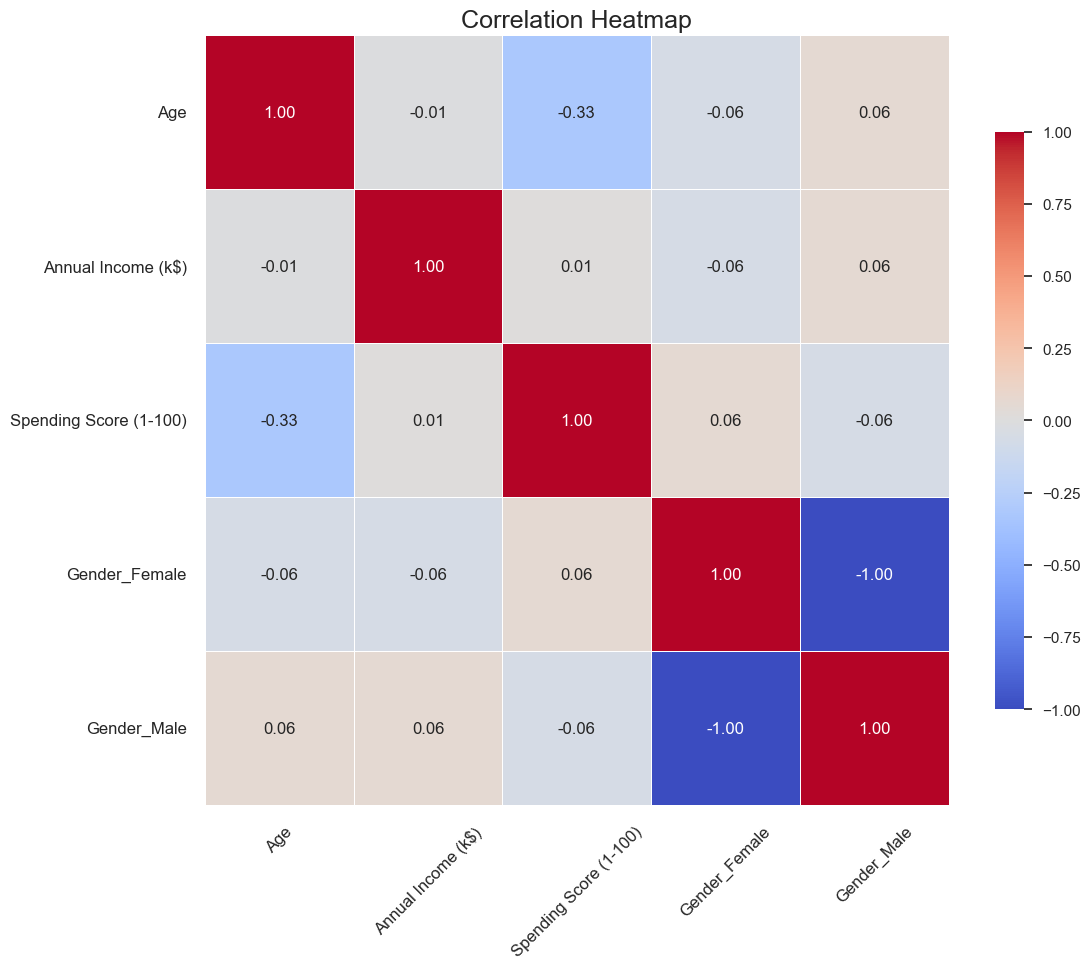

In [25]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", cbar_kws={"shrink": 0.75})
heatmap.set_title('Correlation Heatmap', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

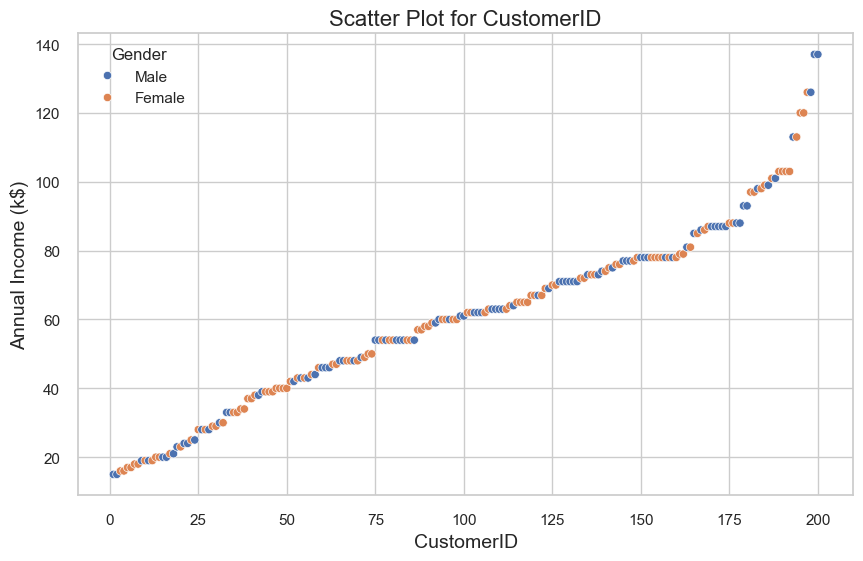

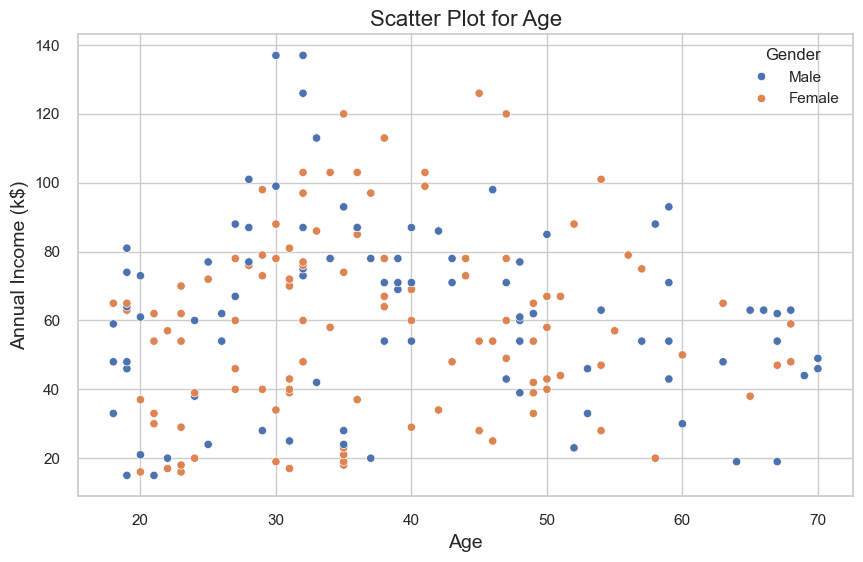

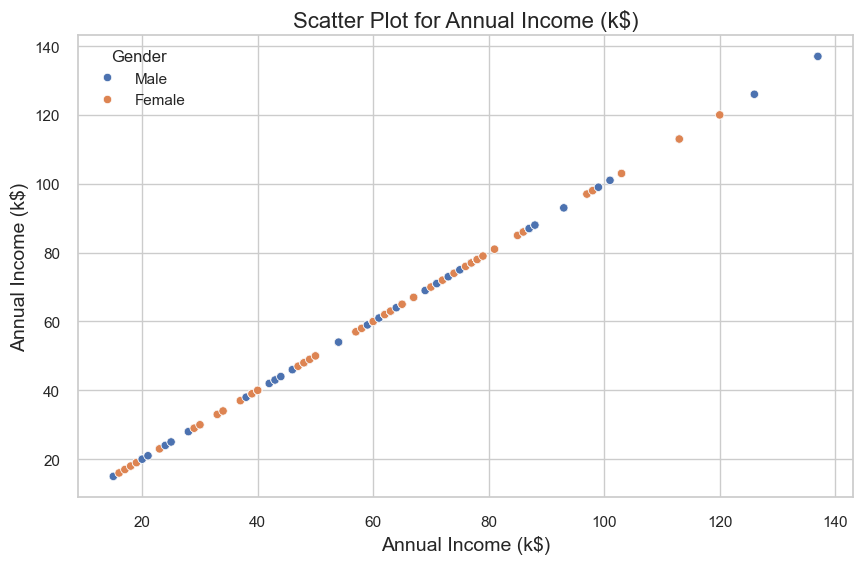

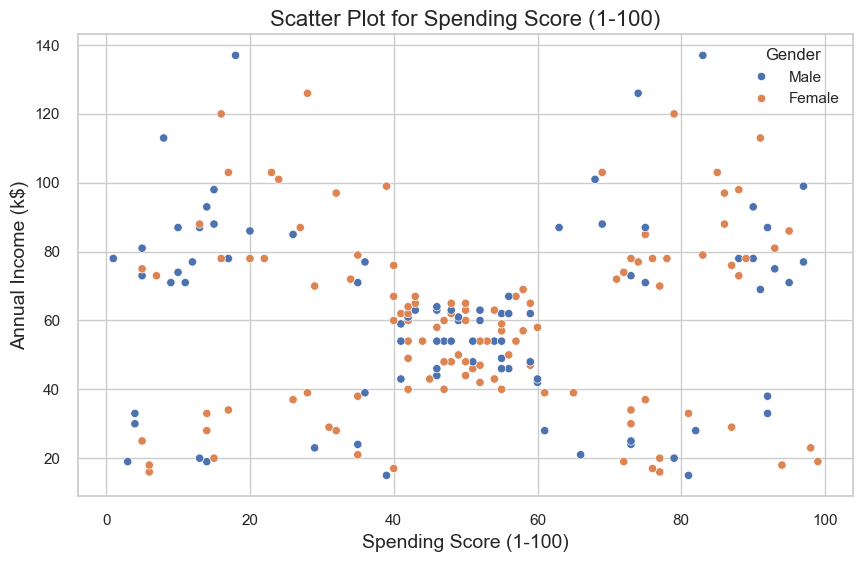

In [26]:
def scatter_plots_for_numerical_columns(df, hue_column=None):
    """
    Create scatter plots for each numerical column in the DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - hue_column: str or None, optional
        The column to use for coloring points. If None, no coloring is applied.

    Returns:
    - None
        Displays the scatter plots.
    """
    # Get the numerical columns of the DataFrame
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(10, 6))
        scatter = sns.scatterplot(data=df, x=col, y="Annual Income (k$)", hue=hue_column)
        scatter.set_title(f'Scatter Plot for {col}', fontsize=16)
        scatter.set_xlabel(col, fontsize=14)
        scatter.set_ylabel('Annual Income (k$)', fontsize=14)
        if hue_column:
            scatter.legend(title=hue_column, title_fontsize=12)

        plt.show()

scatter_plots_for_numerical_columns(df, hue_column='Gender')

In [27]:
# building the model 

In [28]:
df3 = df.drop(columns=['CustomerID'],axis=1)

In [29]:
df_km=df3.copy(deep=True)
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Get a list of categorical columns
categorical_cols = df_km.select_dtypes(include='object').columns
# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_km[col] = le.fit_transform(df_km[col])

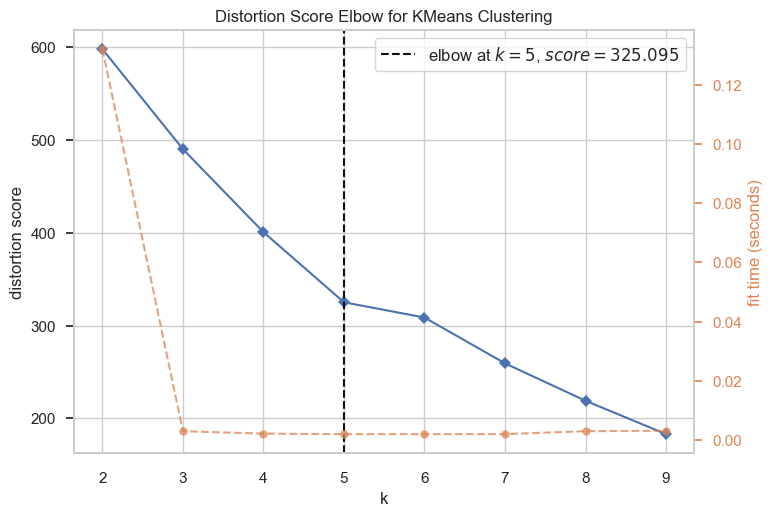

In [31]:
# select the features
X = df_km
#Scaling Data

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

In [32]:
#Silhouette Analysis


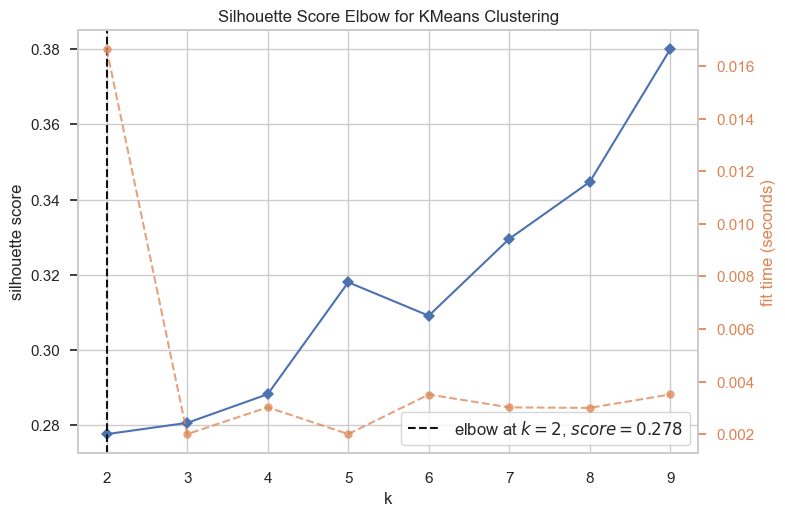

In [34]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X)
visualizer.show()
plt.show()

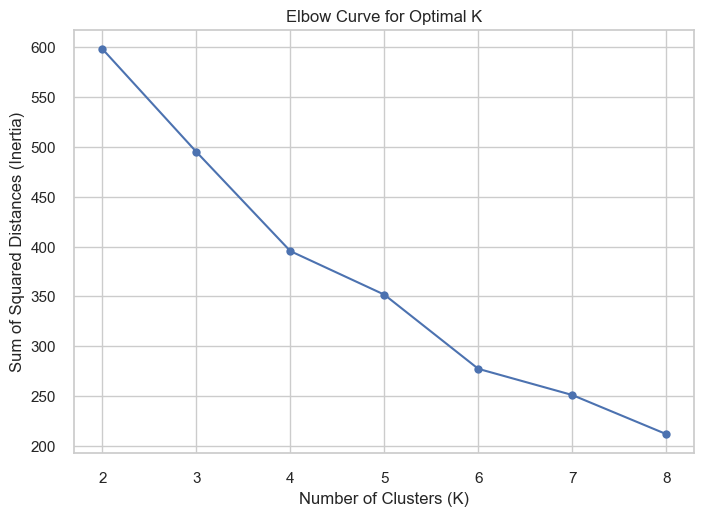

In [35]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterate over different numbers of clusters
for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)

    # Fit KMeans to the scaled data
    kmeans.fit(X)

    # Append the sum of squared distances (inertia) to the list
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [36]:
# the choice would be k=4

In [37]:
# create a k-means object with the optimal number of clusters
optimal_k = 4 # number of clusters where the elbow is
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [38]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [39]:
# Adding the clusters to the dataframe
df_km['cluster'] = y_kmeans
df_km.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2


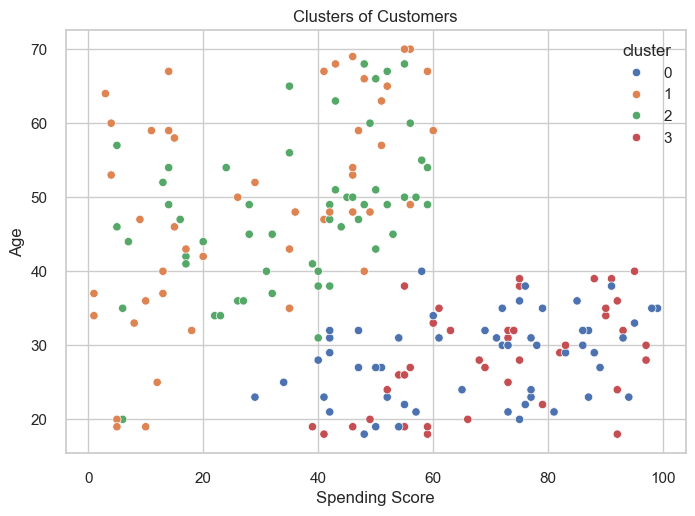

In [40]:
sns.scatterplot(x='Spending Score (1-100)', y='Age', hue='cluster', data=df_km, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

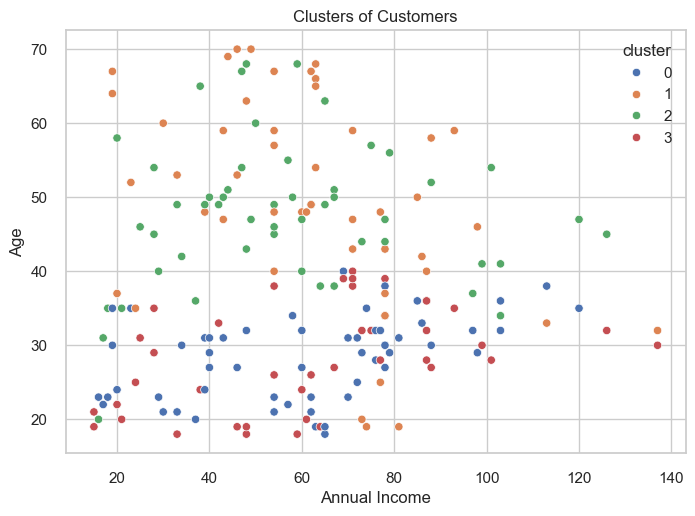

In [42]:
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='cluster', data=df_km, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.show()

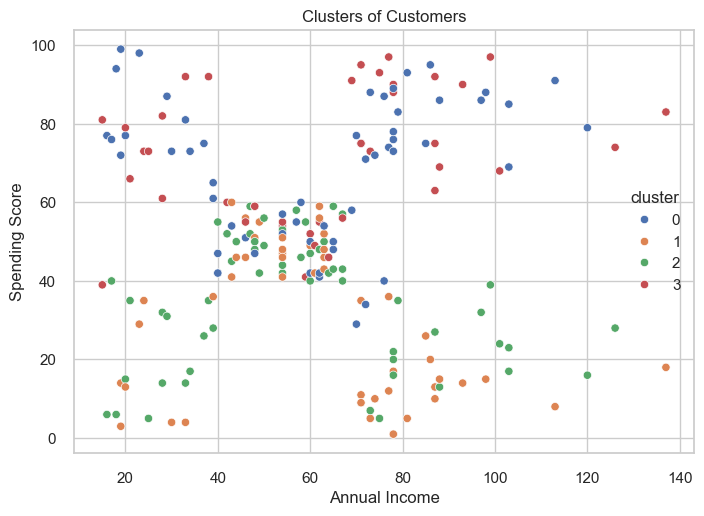

In [43]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

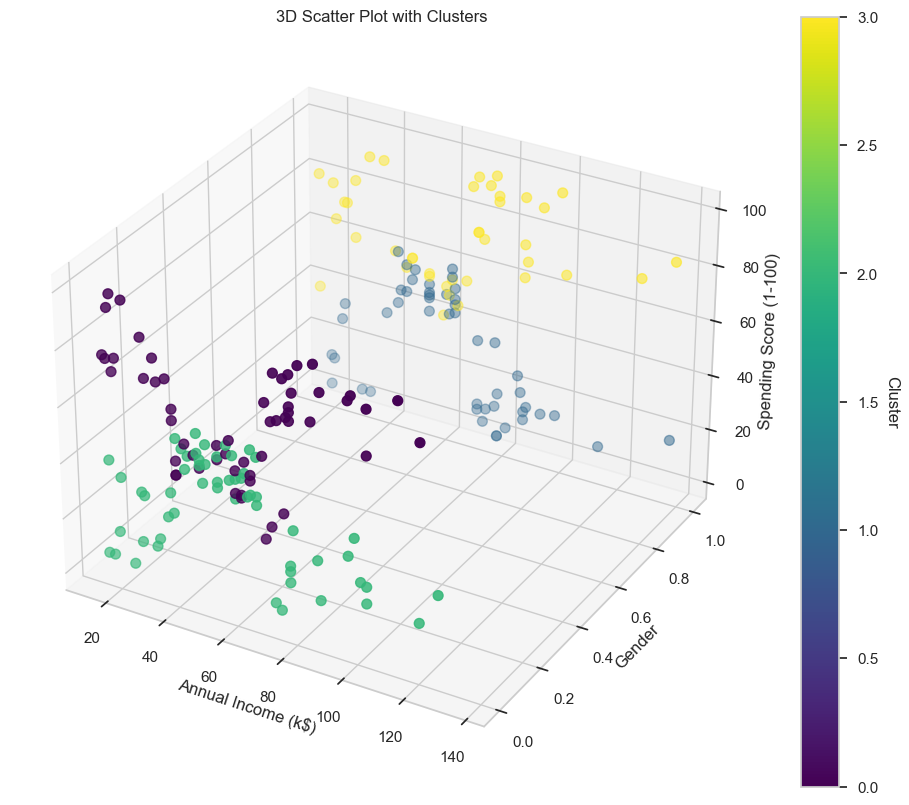

In [44]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_km['Annual Income (k$)'],
            df_km['Gender'],
            df_km['Spending Score (1-100)'],
            c=df_km['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Gender')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster', rotation=270, labelpad=15)
plt.show()

In [45]:
df_km.groupby('cluster').describe()

Gender                                      Age             ...  \
         count mean  std  min  25%  50%  75%  max count       mean  ...   
cluster                                                             ...   
0         56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  56.0  28.392857  ...   
1         48.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  48.0  49.437500  ...   
2         56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  56.0  47.803571  ...   
3         40.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  40.0  28.250000  ...   

        Annual Income (k$)        Spending Score (1-100)             \
                       75%    max                  count       mean   
cluster                                                               
0                     78.0  120.0                   56.0  68.178571   
1                     78.0  137.0                   48.0  29.208333   
2                     73.5  126.0                   56.0  34.875000   
3                     78.0  137.0                   40.0  71.675000   

                                                    
               std   min    25%   50%    75%   max  
cluster                                             
0        18.502194  29.0  51.75  73.0  83.50  99.0  
1        19.266284   1.0  11.75  32.0  46.25  60.0  
2        16.329630   5.0  21.50  39.5  48.25  59.0  
3        16.727664  39.0  58.25  73.0  88.50  97.0  

[4 rows x 32 columns]

In [46]:
#Hierarchical Clustering


In [47]:
df4 = df.drop(columns=['CustomerID'],axis=1)

In [48]:
df_hr = df4.copy(deep=True)

In [49]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [50]:
categorical_cols = df_hr.select_dtypes(include='object').columns
for col in categorical_cols:
    df_hr[col] = le.fit_transform(df_hr[col])

In [51]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [52]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
cluster_labels = model.fit_predict(df_hr)
cluster_labels

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [53]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5]

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

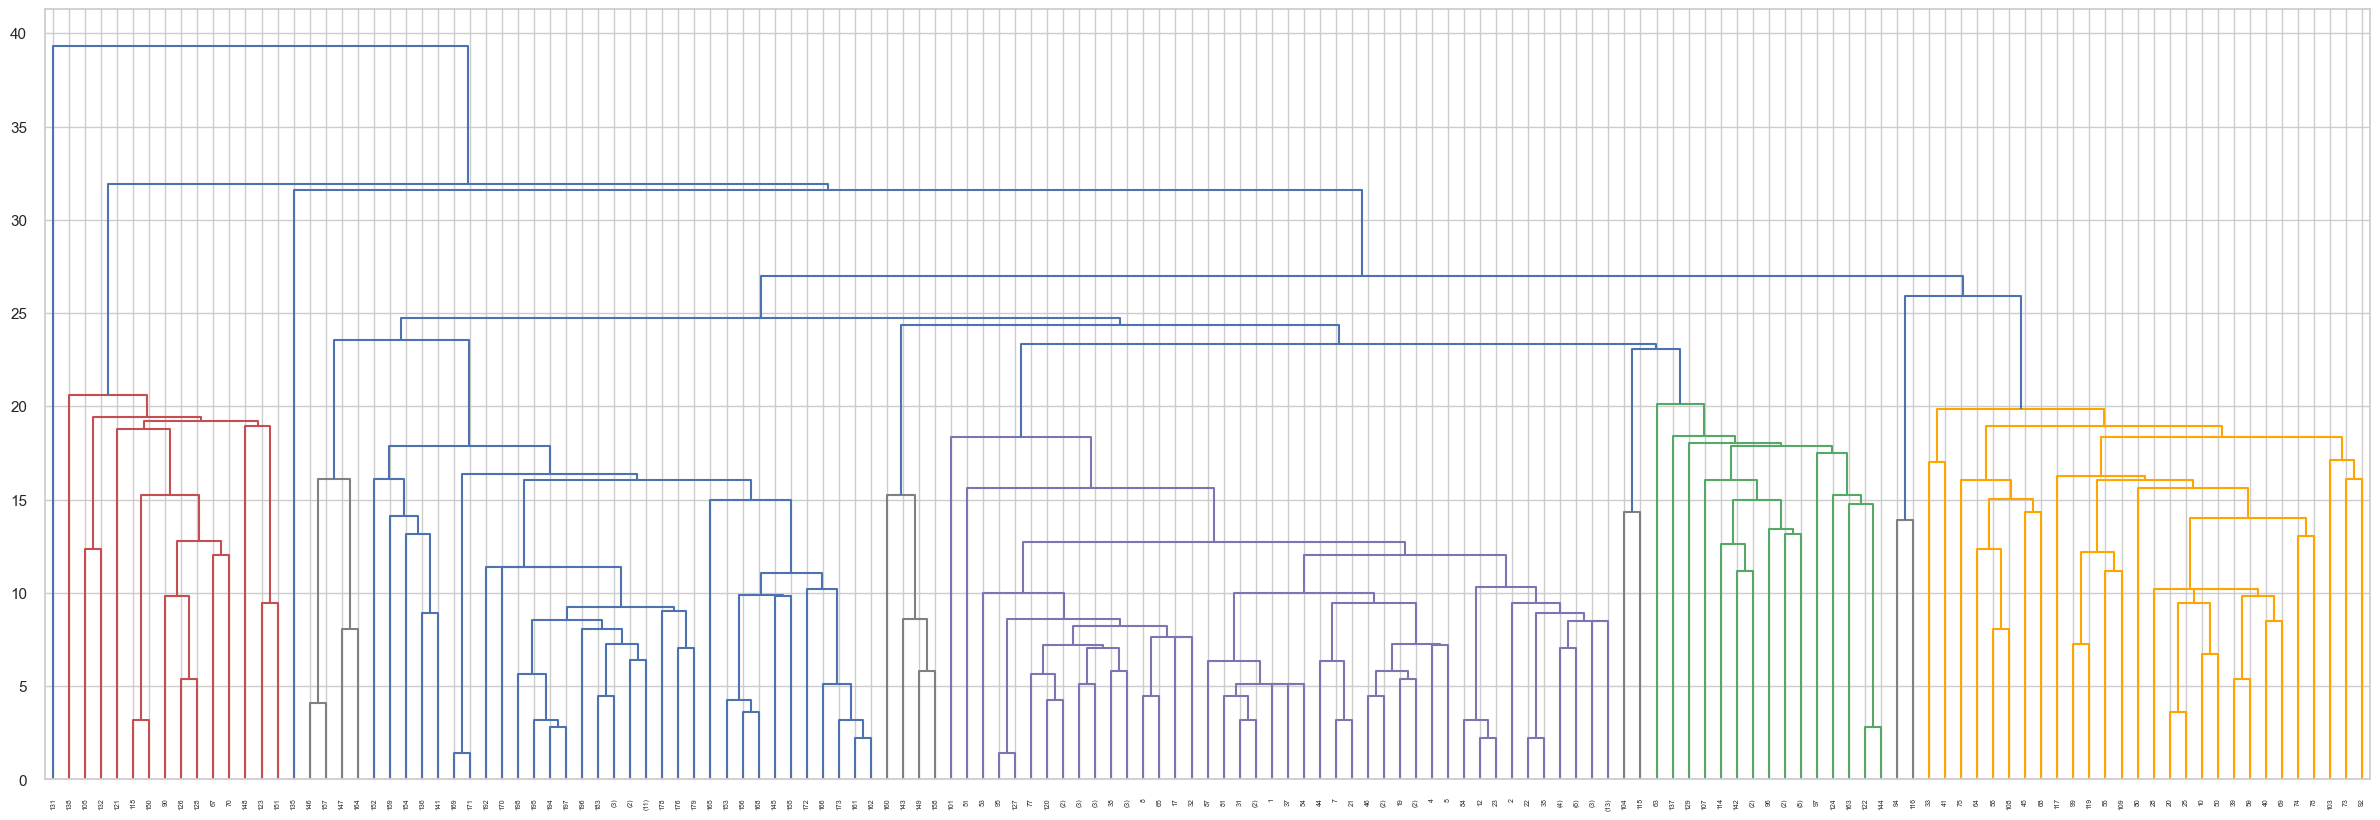

In [54]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange'])
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23)

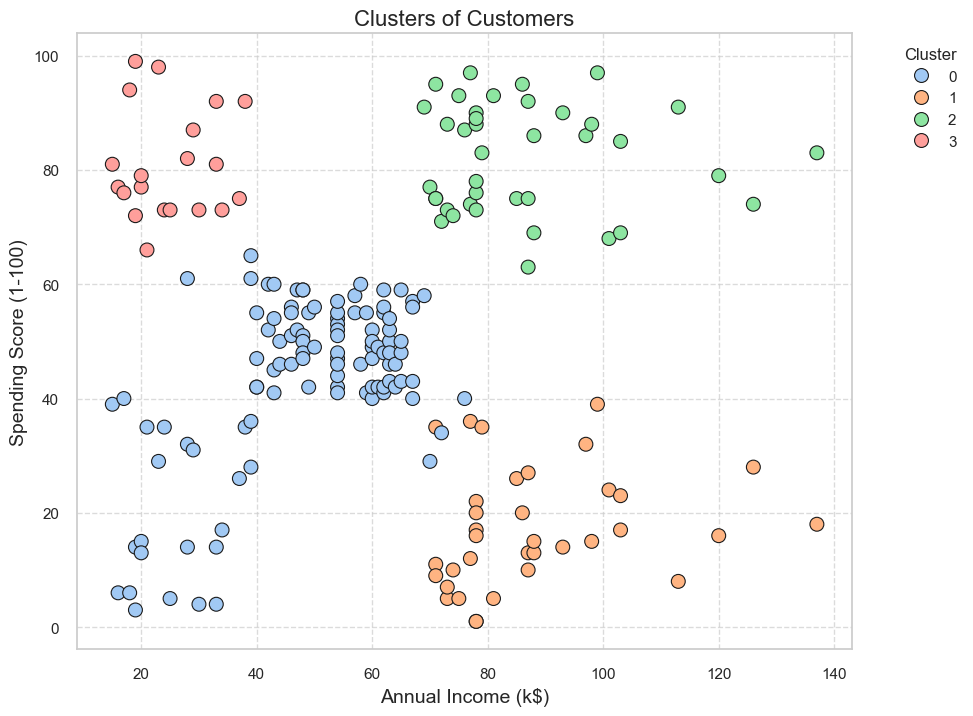

In [55]:
model = AgglomerativeClustering(n_clusters=4)
df_hr['cluster'] = model.fit_predict(df_hr)
cluster_palette = sns.color_palette('pastel', as_cmap=True)

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    data=df_hr,
    palette=cluster_palette,
    edgecolor='k',
    s=100,
)

plt.title('Clusters of Customers', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

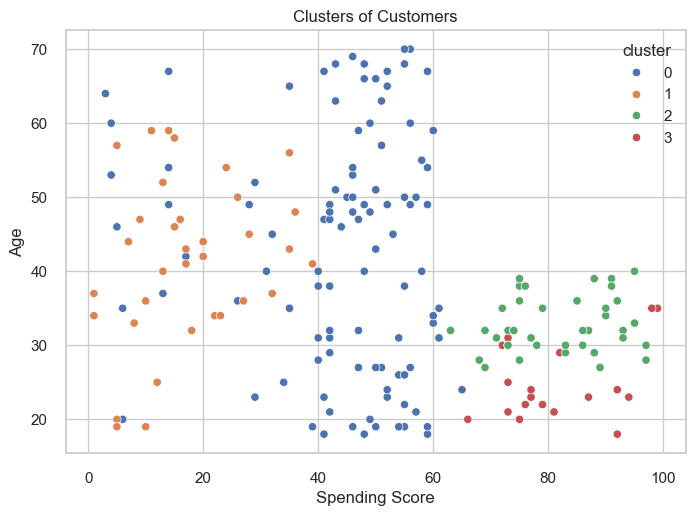

In [56]:
sns.scatterplot(x='Spending Score (1-100)', y='Age', hue='cluster', data=df_hr, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

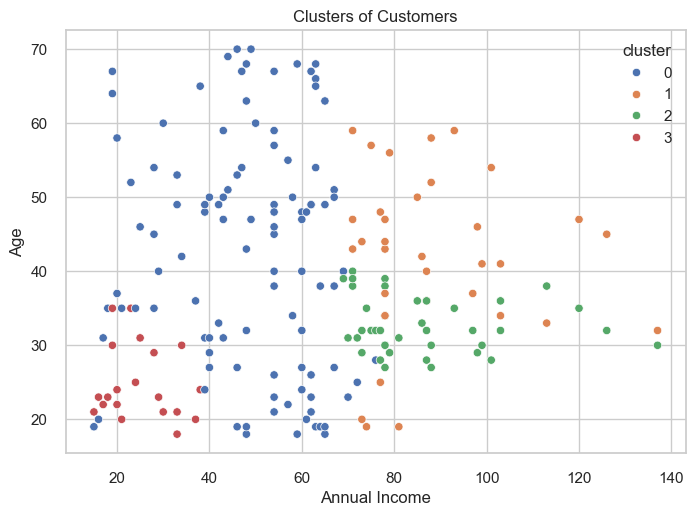

In [57]:
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='cluster', data=df_hr, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.show()

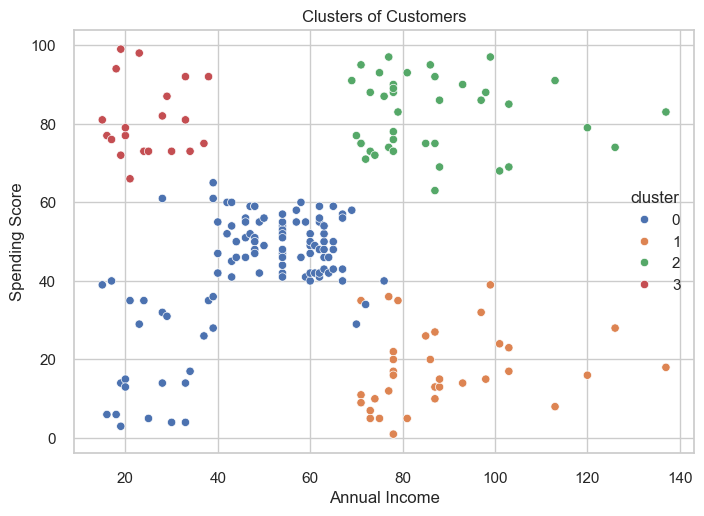

In [58]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_hr, palette="deep")
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

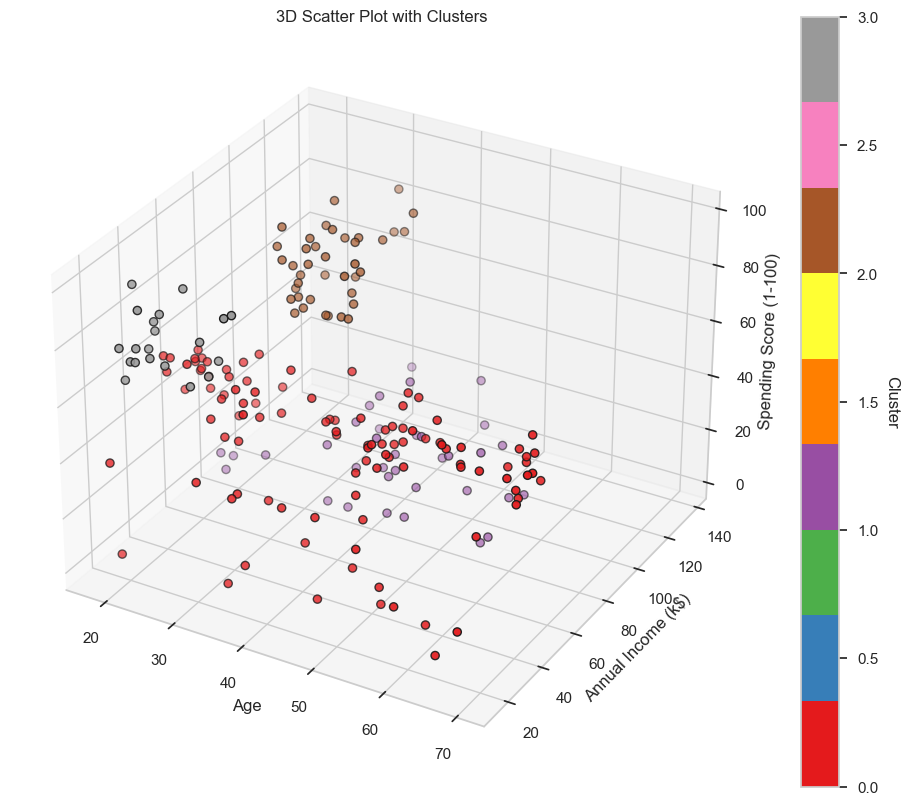

In [59]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_hr['Age'],
           df_hr['Annual Income (k$)'],
           df_hr['Spending Score (1-100)'],
           c=df_hr['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster', rotation=270, labelpad=15)
plt.show()

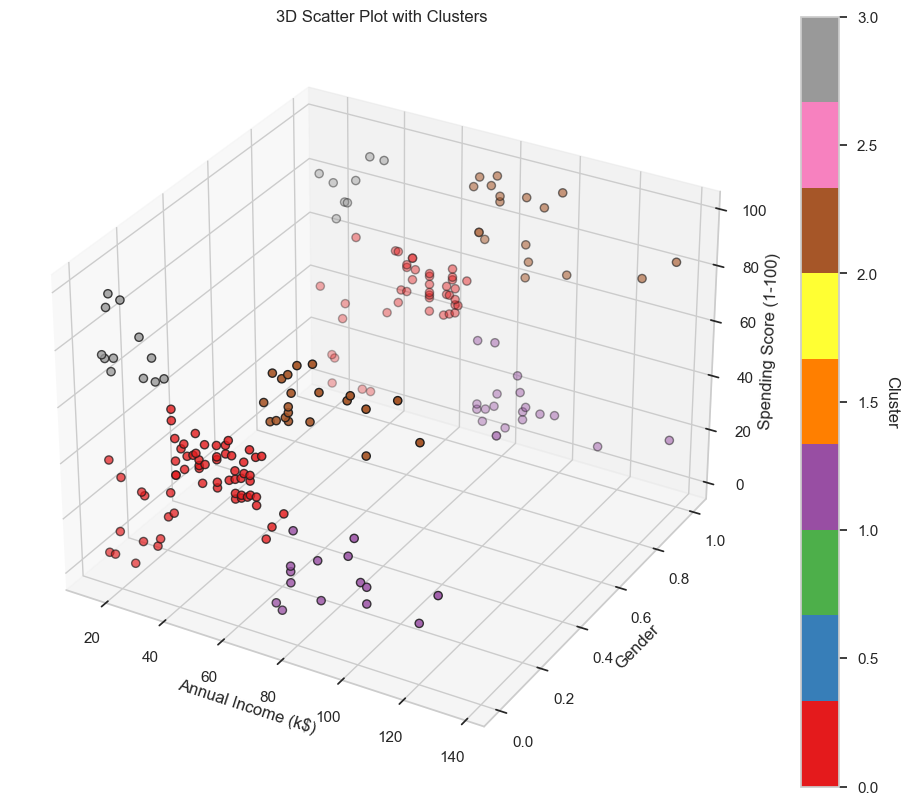

In [60]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_hr['Annual Income (k$)'],
           df_hr['Gender'],
           df_hr['Spending Score (1-100)'],
           c=df_hr['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Gender')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster', rotation=270, labelpad=15)
plt.show()